# The Movie Database (TMDb) EDA

### Importing Packages and Dataset

In [ ]:
# Importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast # to evaluate literals, eg: transform string-lists back into lists



In [ ]:
df = pd.read_csv("TMDB_movies.csv")

### Viewing the Dataset

In [ ]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


### Data Cleaning and Pre-Processing

In [ ]:
# Function to extract genres for each datapoint.

def extract_data(x):
    x = ast.literal_eval(x) # Transform '['name', 'id']' back into ['name', 'id']
    Data = [] # Empty list to store the genres

    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Data.append(item['name']) ## Grab the 'name' key for each dictionary

    ''' Return the Data'''
    return Data

In [ ]:
# Apply the function to all the columns with dictionaries

columns_to_process = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']

for i in columns_to_process:
  df[i] = df[i].apply(extract_data)

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [24]:
# Checking nulls
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [25]:
# Drop homepage and tagline columns as it's not relevant to my analysis
df.drop('homepage', axis=1, inplace=True)
df.drop('tagline', axis=1, inplace=True)

In [31]:
df[df['overview'].isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,[Drama],370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,[Taodue Film],[Italy],2015-12-03,0,NaN,[Español],Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,[Eyeline Entertainment],[United Kingdom],2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,[Documentary],292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,[English],Released,Food Chains,7.4,8


In [32]:
df.dropna(subset = ['overview'], inplace = True)

In [33]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [34]:
df[df['release_date'].isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0


In [35]:
df.dropna(subset = ['release_date'], inplace = True)

In [36]:
# Understanding the statistics
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903105,6.094186,690.789123
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561305,1.188340,1234.941795
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800000,737.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Visualisation

#### 1. Distribution of runtimes among the movies

<Figure size 1000x500 with 0 Axes>

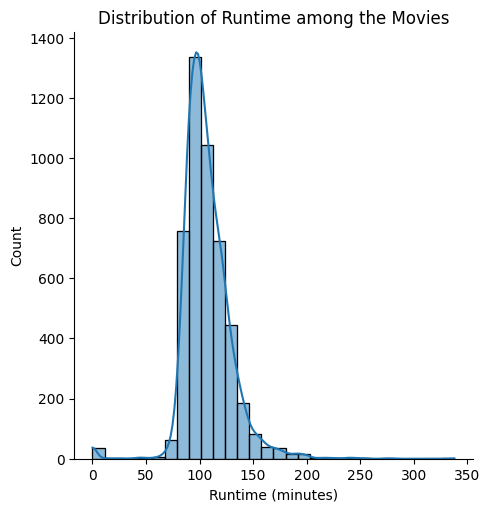

In [38]:
plt.figure(figsize=(10,5)) # Set the size of output
sns.displot(data = df['runtime'], bins=30, kde=True) # Plot a histogram accompanied by a kde curve to smoothen the distribution
plt.title('Distribution of Runtime among the Movies') # Add title
plt.xlabel('Runtime (minutes)') # Add x-axis label

plt.show() # show plot

#### 2. Distribution of movies' runtime across each decade

In [40]:
df['year'] = df['release_date'].str[:4].astype(int) # Add a new column for the year the movie was released

df['decade'] = ((df['year']//10)*10) # Add a new column for the decade the movie was released

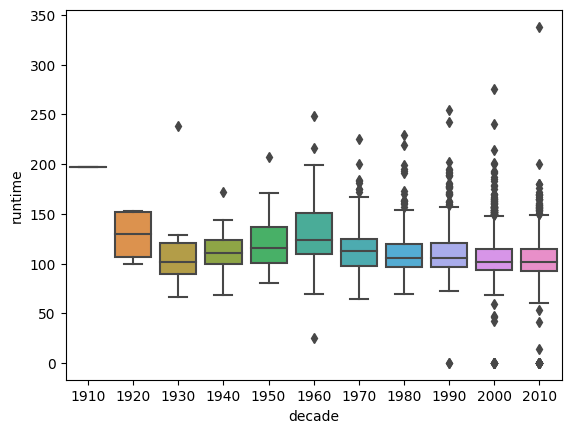

In [41]:
sns.boxplot(x='decade', y = 'runtime', data=df)

plt.show()

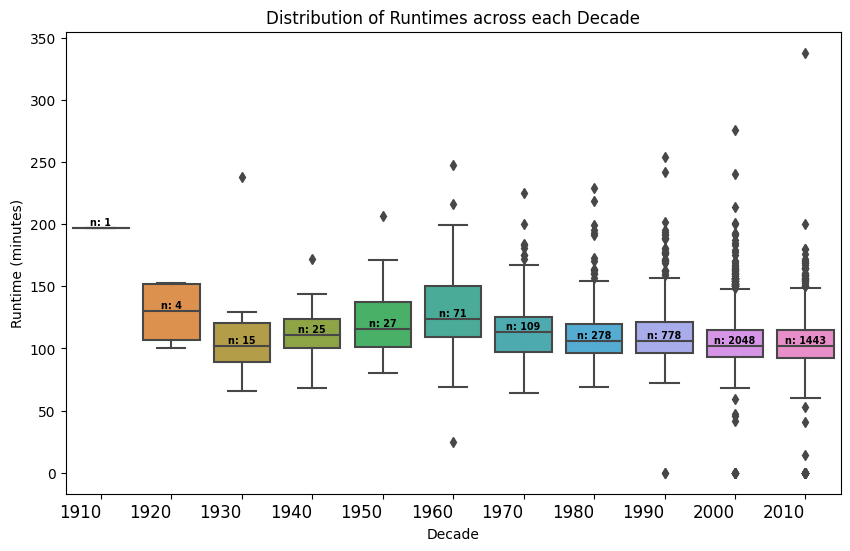

In [67]:
# Get unique 'decade' values and sort them in ascending order
decade_order = sorted(df['decade'].unique())


plt.figure(figsize=(10,6)) # Set the size of output
ax = sns.boxplot(x='decade', y = 'runtime', data=df) # Create the boxplot
plt.xticks( horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large') # Adjust the x-axis labels

plt.title('Distribution of Runtimes across each Decade') # Add a title
plt.xlabel('Decade') # Add x-axis label
plt.ylabel('Runtime (minutes)') # Add y-axis label

# Calculate number of observations per group & median to position labels
medians = df.groupby(['decade'])['runtime'].median().values
nobs = df['decade'].value_counts().loc[decade_order].values
nobs = ["n: " + str(i) for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 2,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='black',
            weight='semibold')

plt.show()

#### 3. Barplot displaying the top 20 most profitable movies

In [68]:
# Add a column for profits
df['profit'] = df['revenue']-df['budget']

# Create new dataframe for the top 20 most profitable movies, sorted from most profitable to least.
top_profitable_movies = df.sort_values('profit', ascending=False).head(20).copy()

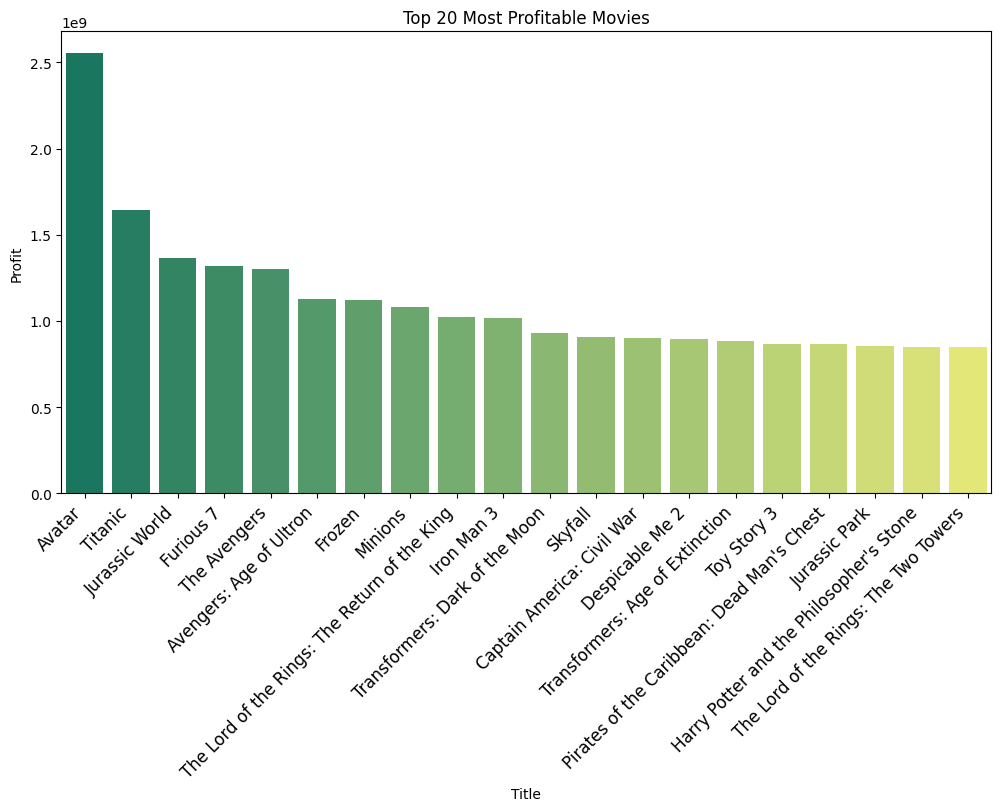

In [69]:
# Set the size of the output
plt.figure(figsize=(12,6))

# Create a bar plot to showcase the profits of the top 20 most profitable movies
sns.barplot(x='original_title', y='profit', data=top_profitable_movies, palette = 'summer')

# Adjust the labels
plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large')
plt.xlabel('Title')
plt.ylabel('Profit')


# Add title
plt.title('Top 20 Most Profitable Movies')

# Show graph
plt.show()

#### 4. Barplot displaying the genre counts within the top 20 most profitable movies

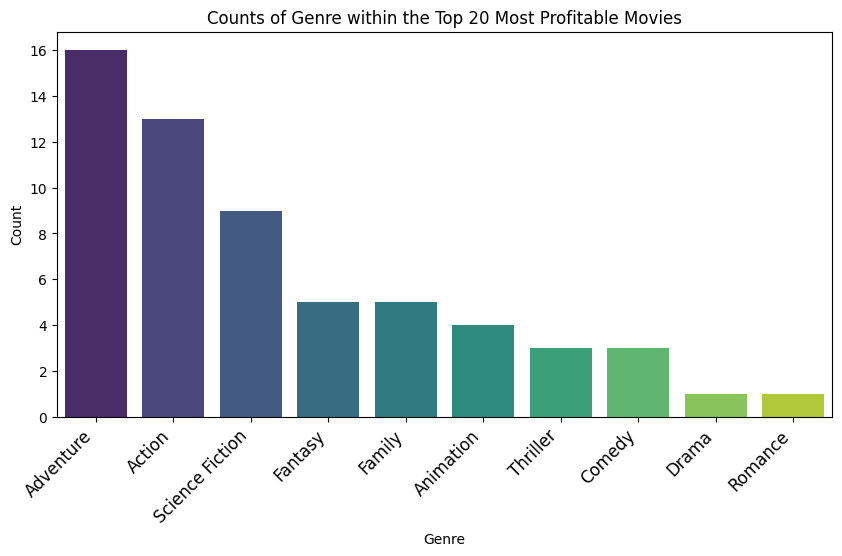

In [71]:
# Create a new dataframe for the genres of the top 20 most profitable movies
top_movies_genres = top_profitable_movies[['original_title','genres']].copy()

# Explode the lists in the 'extracted_genres' column into separate rows
top_movies_genres_exploded = top_movies_genres.explode('genres')

# Group the data by 'genres' and calculate the count of movies in each genre
genre_counts = top_movies_genres_exploded['genres'].value_counts().reset_index() # Reset the index
genre_counts.columns = ['Genre', 'Count'] # Rename the columns


plt.figure(figsize=(10, 5)) # Set the size of the output
sns.barplot(x='Genre' ,y='Count', data= genre_counts, palette='viridis') # Create a bar plot using Seaborn

# Set the title
plt.title('Counts of Genre within the Top 20 Most Profitable Movies')

# Adjust the labels
plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large')

# Show the plot
plt.show()

## Keypoints

#### 1. Runtime trend in recent decades
A gradual downward trend is observed in the runtimes of movies in recent decades (as seen in the second visualisation). This is an interesting observation especially knowing that in recent years we’ve been getting a lot of advances in technology  and consumption of media which ultimately leaves an impact on the attention span of an ordinary human. The trend observed here might have something to do with this. It's also interesting to mention that the gradual decrease in runtime is also observed as more movies are being produced.

#### 2. The most profitable movies are not dependent on the average votes
It is surprising to find out that the profit of movies are not dependent on the average vote received. In fact, it has quite a low correlation (see both cells below!). I am interested in analysing further on the factors that could have contributed to the massive profits and the lack thereof received by some movies.

In [72]:
# Create a new dataframe to showcase the vote_average column and profit column side by side
new_df = top_profitable_movies[['vote_average', 'profit']].sort_values('vote_average', ascending=False).copy()
new_df

,vote_average,profit
329,8.1,1024888979
330,8.0,847287400
675,7.6,857100000
42,7.6,866969703
25,7.5,1645034188
197,7.5,851475550
16,7.4,1299557910
44,7.3,1316249360
7,7.3,1125403694
124,7.3,1124219009


In [73]:
new_df.corr() # Find the correlation between each column

,vote_average,profit
vote_average,1.000000,0.055108
profit,0.055108,1.000000


## Selected Movies (for future in-depth single observation analysis)


#### 1. Avatar
It has the highest profit among all the movies in this dataset despite not having the largest budget. What's even more eye-catching is that there's a significant gap between the profits of the avatar movie and the next most profitable movie and its also been that way for at least 6 years. I want to explore the factors that contributes to the movie's success.

In [74]:
top_profitable_movies

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,decade,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009,2000,2550965087
25,200000000,"[Drama, Romance, Thriller]",597,"[shipwreck, iceberg, ship, panic, titanic, oce...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],...,1845034188,194.0,"[English, Français, Deutsch, svenska, Italiano...",Released,Titanic,7.5,7562,1997,1990,1645034188
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",135397,"[monster, dna, tyrannosaurus rex, velociraptor...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[Universal Studios, Amblin Entertainment, Lege...",[United States of America],...,1513528810,124.0,[English],Released,Jurassic World,6.5,8662,2015,2010,1363528810
44,190000000,[Action],168259,"[car race, speed, revenge, suspense, car, race...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[Universal Pictures, Original Film, Fuji Telev...","[Japan, United States of America]",...,1506249360,137.0,[English],Released,Furious 7,7.3,4176,2015,2010,1316249360
16,220000000,"[Science Fiction, Action, Adventure]",24428,"[new york, shield, marvel comic, superhero, ba...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[Paramount Pictures, Marvel Studios]",[United States of America],...,1519557910,143.0,[English],Released,The Avengers,7.4,11776,2012,2010,1299557910
7,280000000,"[Action, Adventure, Science Fiction]",99861,"[marvel comic, sequel, superhero, based on com...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],...,1405403694,141.0,[English],Released,Avengers: Age of Ultron,7.3,6767,2015,2010,1125403694
124,150000000,"[Animation, Adventure, Family]",109445,"[queen, musical, princess, betrayal, snowman, ...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],...,1274219009,102.0,[English],Released,Frozen,7.3,5295,2013,2010,1124219009
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[Universal Pictures, Illumination Entertainment]",[United States of America],...,1156730962,91.0,[English],Released,Minions,6.4,4571,2015,2010,1082730962
329,94000000,"[Adventure, Fantasy, Action]",122,"[elves, orcs, middle-earth (tolkien), based on...",en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,123.630332,"[WingNut Films, New Line Cinema]","[New Zealand, United States of America]",...,1118888979,201.0,[English],Released,The Lord of the Rings: The Return of the King,8.1,8064,2003,2000,1024888979
31,200000000,"[Action, Adventure, Science Fiction]",68721,"[terrorist, war on terror, tennessee, malibu, ...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,[Marvel Studios],"[China, United States of America]",...,1215439994,130.0,[English],Released,Iron Man 3,6.8,8806,2013,2010,1015439994


#### 2. Minions

Despite not gaining the most profit, Minion is placed at number 1 for being the most popular movie. This is an interesting insight given that it is also the only animation movie in the top 5 most popular movies in addition to only having an average vote of 6.4. Surprisingly, it has a runtime of only 91 minutes, making it the shortest movie in the list of top 20 most popular movies. By comparing Minion to similar movies in terms of the genres, runtime, and man other factors, I aim to identify the qualities that made minion the most popular movie with a seemingly strong fan base.

In [75]:
# Create new dataframe to sort the dataframe in order of its popularity
most_popular_movies = df.sort_values('popularity', ascending=False).copy()
most_popular_movies

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,decade,profit
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[Universal Pictures, Illumination Entertainment]",[United States of America],...,1156730962,91.0,[English],Released,Minions,6.4,4571,2015,2010,1082730962
95,165000000,"[Adventure, Drama, Science Fiction]",157336,"[saving the world, artificial intelligence, fa...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[Paramount Pictures, Legendary Pictures, Warne...","[Canada, United States of America, United King...",...,675120017,169.0,[English],Released,Interstellar,8.1,10867,2014,2010,510120017
788,58000000,"[Action, Adventure, Comedy]",293660,"[anti hero, mercenary, marvel comic, superhero...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[Twentieth Century Fox Film Corporation, Marve...",[United States of America],...,783112979,108.0,[English],Released,Deadpool,7.4,10995,2016,2010,725112979
94,170000000,"[Action, Science Fiction, Adventure]",118340,"[marvel comic, spaceship, space, outer space, ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[Marvel Studios, Moving Picture Company (MPC),...","[United Kingdom, United States of America]",...,773328629,121.0,[English],Released,Guardians of the Galaxy,7.9,9742,2014,2010,603328629
127,150000000,"[Action, Adventure, Science Fiction, Thriller]",76341,"[future, chase, post-apocalyptic, dystopia, au...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[Village Roadshow Pictures, Kennedy Miller Pro...","[Australia, United States of America]",...,378858340,120.0,[English],Released,Mad Max: Fury Road,7.2,9427,2015,2010,228858340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,550000,"[Drama, Thriller]",75986,"[obsession, radio, nudity, letter, love, roman...",en,Love Letters,A story of love and obsession. A young radio p...,0.001586,"[New World Pictures, Millennium Films]",[United States of America],...,0,98.0,[English],Released,Love Letters,4.6,4,1983,1980,-550000
4625,0,[Horror],426067,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],[],...,0,94.0,[English],Released,Midnight Cabaret,0.0,0,1990,1990,0
4118,0,[],325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],...,0,0.0,[],Released,Hum To Mohabbat Karega,0.0,0,2000,2000,0
4727,0,"[Action, Drama]",65448,"[prison, boxing]",en,Penitentiary,A hitchhiker named Martel Gordone gets in a fi...,0.001117,[],[],...,0,99.0,[English],Released,Penitentiary,4.9,8,1979,1970,0
